### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
carteira = pd.read_excel('carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,JHSF3,Ação,100
1,EGIE3,Ação,100
2,BBAS3,Ação,1000
3,BBDC4,Ação,100
4,ITSA4,Ação,100
5,ABCB4,Ação,300
6,TRPL4,Ação,100
7,BBDC3,Ação,100
8,WEGE3,Ação,100
9,FLRY3,Ação,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [89]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start="2019-01-01", end=None)['Adj Close']
    
display(cotacoes_carteira)



# cotacoes_carteira = pd.DataFrame()

# for ativo in carteira['Ativos']:
#   cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start='2020-01-01', end='2020-11-10')['Adj Close']
   
# display(cotacoes_carteira)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,JHSF3,EGIE3,BBAS3,BBDC4,ITSA4,ABCB4,TRPL4,BBDC3,WEGE3,FLRY3,PSSA3,BBSE3,RECR11
Date,,,,,,,,,,,,,
2019-01-02,1.575390,26.367624,36.929459,20.331230,8.672868,13.683843,12.582062,18.304924,8.468709,16.854364,20.744829,20.220575,NaN
2019-01-03,1.559636,27.232645,37.081421,20.537197,8.748284,13.667856,12.761806,18.687504,8.661824,17.212683,20.086708,20.441916,NaN
2019-01-04,1.528128,27.817310,37.081421,20.376041,8.720859,13.547963,13.229138,18.277918,8.760734,17.549360,19.233141,20.241995,NaN
2019-01-07,1.567513,27.645018,36.838276,20.617775,8.714005,13.587927,13.121294,18.431515,8.624142,17.801870,19.620041,19.942116,NaN
2019-01-08,1.559636,27.958277,36.420353,20.743671,8.830556,13.843700,13.083546,18.636312,8.553491,18.012297,20.102661,19.649372,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,3.750000,39.900002,38.310001,12.970803,7.990000,16.680000,21.690001,11.602691,41.730000,14.530000,23.680000,32.820000,79.989998
2023-03-30,3.800000,40.349998,39.009998,13.360228,8.160000,17.000000,21.690001,11.912229,41.860001,14.820000,23.670000,32.570000,76.500000
2023-03-31,3.700000,40.169998,39.110001,13.150537,8.220000,16.830000,21.670000,11.832348,40.549999,14.520000,23.520000,32.509998,77.250000


### Será que todos os dados vieram corretos?

In [90]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1058 entries, 2019-01-02 to 2023-04-04
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JHSF3   1058 non-null   float64
 1   EGIE3   1058 non-null   float64
 2   BBAS3   1058 non-null   float64
 3   BBDC4   1058 non-null   float64
 4   ITSA4   1058 non-null   float64
 5   ABCB4   1058 non-null   float64
 6   TRPL4   1058 non-null   float64
 7   BBDC3   1058 non-null   float64
 8   WEGE3   1058 non-null   float64
 9   FLRY3   1058 non-null   float64
 10  PSSA3   1058 non-null   float64
 11  BBSE3   1058 non-null   float64
 12  RECR11  454 non-null    float64
dtypes: float64(13)
memory usage: 115.7 KB


### Ajustando os dados

In [91]:
# df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)

cotacoes_carteira = cotacoes_carteira.ffill()
cotacoes_carteira.info()

# Nessa caso do RECR11 não deu certo pq, o ticket era outro.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1058 entries, 2019-01-02 to 2023-04-04
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JHSF3   1058 non-null   float64
 1   EGIE3   1058 non-null   float64
 2   BBAS3   1058 non-null   float64
 3   BBDC4   1058 non-null   float64
 4   ITSA4   1058 non-null   float64
 5   ABCB4   1058 non-null   float64
 6   TRPL4   1058 non-null   float64
 7   BBDC3   1058 non-null   float64
 8   WEGE3   1058 non-null   float64
 9   FLRY3   1058 non-null   float64
 10  PSSA3   1058 non-null   float64
 11  BBSE3   1058 non-null   float64
 12  RECR11  454 non-null    float64
dtypes: float64(13)
memory usage: 115.7 KB


### Vamos ver como que as ações foram individualmente

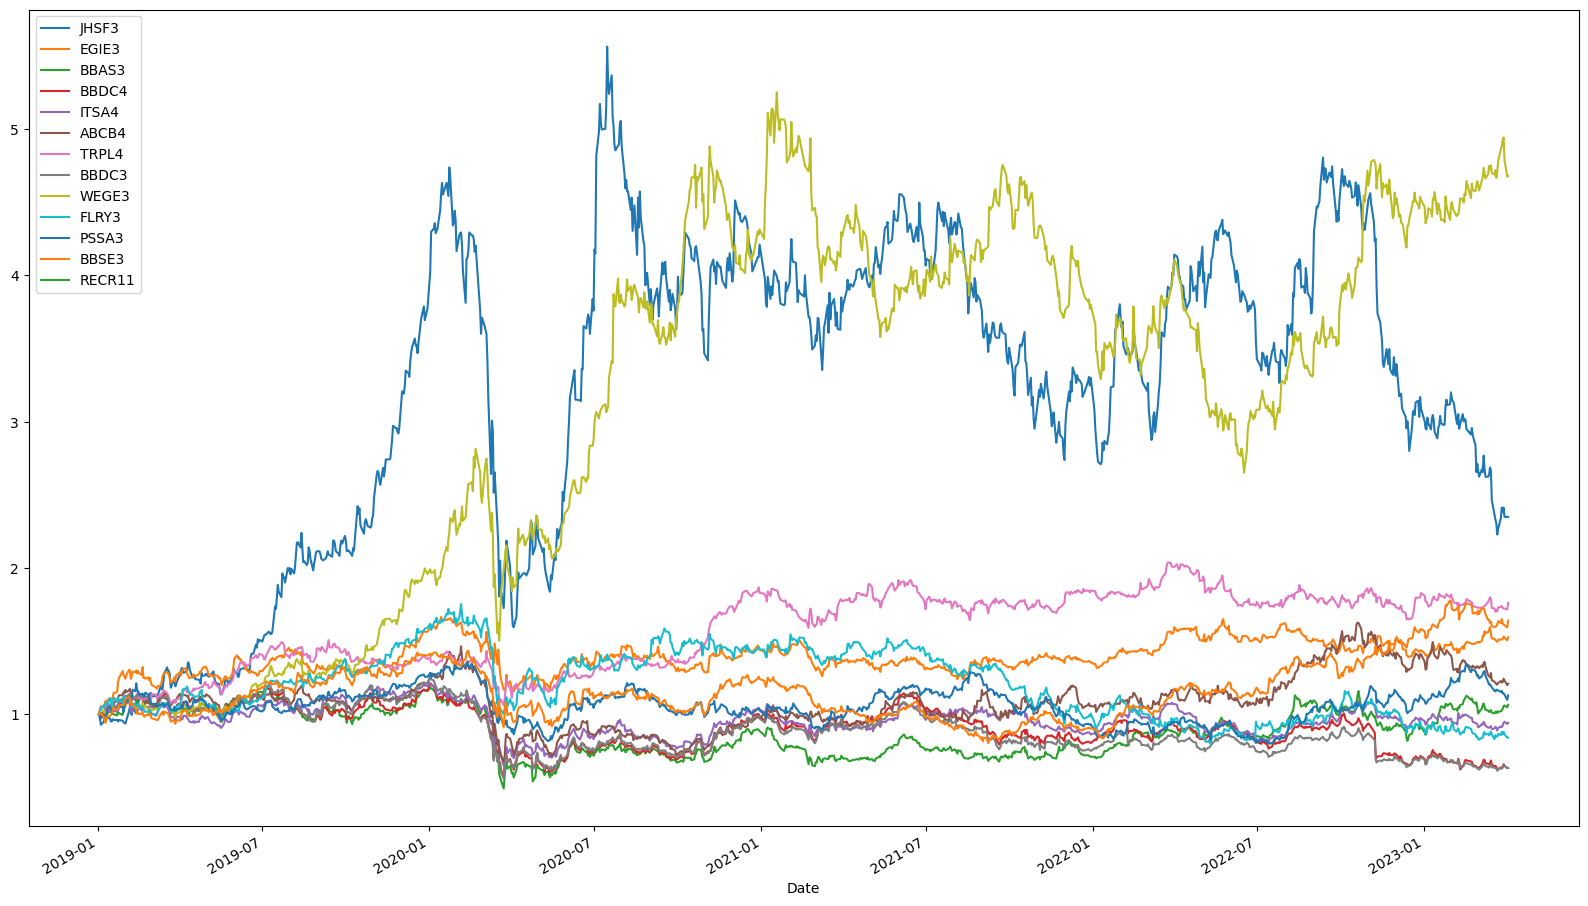

In [92]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(20   , 12))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [93]:
cotacao_ibov = yf.download('^BVSP', start="2019-01-01", end=None)
display(cotacao_ibov)

#yf.download('{}.SA'.format(ativo), start="2021-01-01", end=None)['Adj Close']


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,87887.000000,91479.000000,87536.000000,91012.000000,91012.000000,5615400
2019-01-03,91011.000000,91596.000000,89922.000000,91564.000000,91564.000000,6066200
2019-01-04,91577.000000,92701.000000,90824.000000,91841.000000,91841.000000,5322100
2019-01-07,91845.000000,92552.000000,91288.000000,91699.000000,91699.000000,4565000
2019-01-08,91699.000000,92231.000000,91064.000000,92032.000000,92032.000000,4496500
...,...,...,...,...,...,...
2023-03-29,101185.000000,102213.000000,100248.000000,101793.000000,101793.000000,12456100
2023-03-30,101796.000000,104085.000000,101796.000000,103713.000000,103713.000000,14901600
2023-03-31,103714.000000,104041.000000,101476.000000,101882.000000,101882.000000,15111200


### Criando um dataframe da Carteira com as quantidades de ações

In [94]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

display(valor_investido)

,JHSF3,EGIE3,BBAS3,BBDC4,ITSA4,ABCB4,TRPL4,BBDC3,WEGE3,FLRY3,PSSA3,BBSE3,RECR11
Date,,,,,,,,,,,,,
2019-01-02,157.538950,2636.762428,36929.458618,2033.123016,867.286777,4105.152798,1258.206177,1830.492401,846.870899,1685.436440,2074.482918,2022.057533,NaN
2019-01-03,155.963552,2723.264503,37081.420898,2053.719711,874.828434,4100.356865,1276.180649,1868.750381,866.182423,1721.268272,2008.670807,2044.191551,NaN
2019-01-04,152.812779,2781.731033,37081.420898,2037.604141,872.085857,4064.388943,1322.913837,1827.791786,876.073360,1754.936028,1923.314095,2024.199486,NaN
2019-01-07,156.751263,2764.501762,36838.275909,2061.777496,871.400547,4076.378059,1312.129402,1843.151474,862.414169,1780.187035,1962.004089,1994.211578,NaN
2019-01-08,155.963552,2795.827675,36420.352936,2074.367142,883.055592,4153.110123,1308.354568,1863.631248,855.349064,1801.229668,2010.266113,1964.937210,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,375.000000,3990.000153,38310.001373,1297.080326,798.999977,5004.000092,2169.000053,1160.269070,4172.999954,1452.999973,2368.000031,3281.999969,7998.999786
2023-03-30,379.999995,4034.999847,39009.998322,1336.022758,815.999985,5100.000000,2169.000053,1191.222858,4186.000061,1481.999969,2367.000008,3256.999969,7650.000000
2023-03-31,370.000005,4016.999817,39110.000610,1315.053749,822.000027,5048.999977,2167.000008,1183.234787,4054.999924,1452.000046,2352.000046,3250.999832,7725.000000


### Comparação Carteira x IBOV

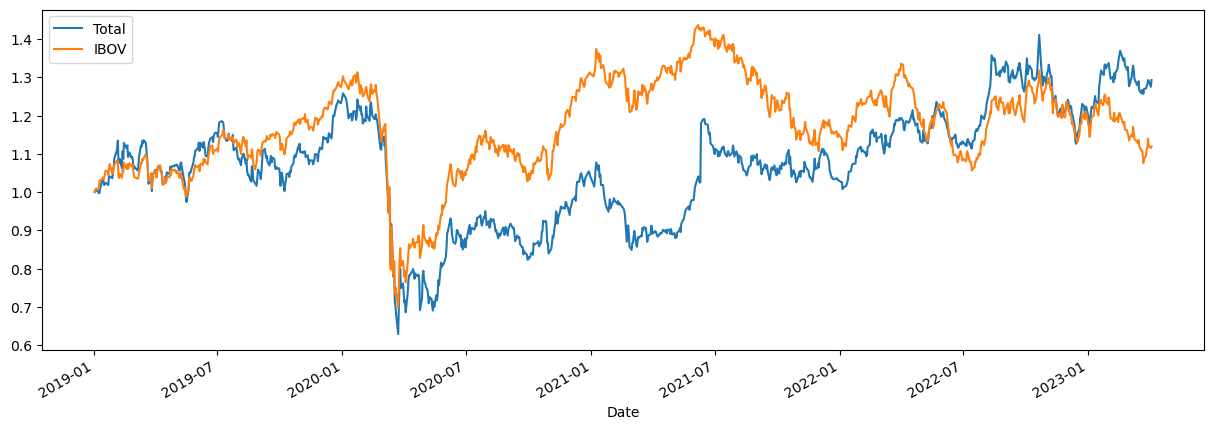

In [98]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]



valor_investido_norm['Total'].plot(figsize=(15,5))
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()


# valor_investido['Total'].plot(figsize=(15,5))
# cotacao_ibov['Adj Close'].plot(label='IBOV')

### Retorno da Carteira x IBOV

In [124]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] -1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] -1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))


Retorno da Carteira: 29.29%
Retorno IBOV: 11.93%


### Correlação da Carteira com o IBOV

In [128]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print('Correlação entre carteira e IBOV {:.2}'.format(correlacao))

Correlação entre carteira e IBOV 0.46
